In [1]:
# import os, sys
# sys.path.insert(0, '/Users/mirjetapasha/Documents/Research_Projects/TRIPS_June25/multiparameter_package')
from trips.solvers.tSVD import *
from trips.testProblems import Deblurring
import matplotlib.pyplot as plt
from trips.helpers import *
from trips.solvers.CGLS import *

In [15]:
# Deblurring example test problem
Deblur = Deblurring()
# In the class Deblurring we have can define the type of problem to be used.
generate_matrix = True #Defines a blurring operator where the forward operator matrix is formed explicitly
nx = 32 # Define the first dimension of the image
ny = 32 # Defines the second dimension of the image
spread = 1 # The PSF parameter
choose_image = 'satellite' #The choice of the image
if generate_matrix == True:
        size = nx
        shape = (size, size)
        spreadnew = (spread, spread)
        A = Deblur.forward_Op_matrix(spreadnew, nx, ny)

In [16]:
x_true = Deblur.gen_true(choose_image)
b_true = Deblur.gen_data(x_true, generate_matrix)
(b, delta) = Deblur.add_noise(b_true, 'Gaussian', noise_level = 0.01)
# Deblur.plot_rec(x_true.reshape((shape), order = 'F'), save_imgs = False, save_path='./saveImagesDeblurring'+'rec'+choose_image)
# Deblur.plot_data(b.reshape((shape), order = 'F'), save_imgs = False, save_path='./saveImagesDeblurring'+'data'+choose_image)
b_vec = b.reshape((-1,1))
x_0 = A.T@b_vec

data already in the path.


In [18]:
L = spatial_derivative_operator(nx, ny, 1)

In [20]:
L.shape

(2048, 1024)

In [21]:
A.shape

(1024, 1024)

In [25]:
L = L.todense()


In [26]:
Ahat = np.concatenate((A, L))

In [29]:
bhat = np.concatenate((b_vec, np.zeros((L.shape[0], 1) )))

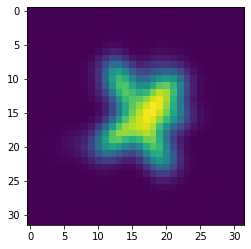

In [33]:
x_cgls, info = TP_cgls(Ahat, bhat, x_0, max_iter = 10, tol = 0.001)
plt.imshow(x_cgls.reshape((imagesize_x, imagesize_y)))